## Web Scrapping And Analysis of "list of most popular website" from Wikipedia

In [27]:
# import necessary libraries

import pandas as pd
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("white")

In [2]:
# Request for the HTML response using the URL

wikipedia_url = "https://en.wikipedia.org/wiki/List_of_most_visited_websites"
response = requests.get(wikipedia_url)
print(response.status_code)


200


In [3]:
# parse data from the html into a beautifulsoup object

soup = BeautifulSoup(response.text, "html.parser")
website_table = soup.find("table", {"class":"wikitable"})

In [4]:
website_table

<table class="wikitable sortable mw-datatable" style="width:100%; font-size:96%;">
<tbody><tr>
<th>Site
</th>
<th>Domain Name
</th>
<th data-sort-type="number"><a href="/wiki/Similarweb" title="Similarweb">Similarweb</a> top 50<br/>websites ranking<br/><small>(As of April 1, 2022<sup class="plainlinks noexcerpt noprint asof-tag update" style="display:none;"><a class="external text" href="https://en.wikipedia.org/w/index.php?title=List_of_most_visited_websites&amp;action=edit">[update]</a></sup>)</small><sup class="reference" id="cite_ref-Similarweb_1-0"><a href="#cite_note-Similarweb-1">[1]</a></sup>
</th>
<th>Category
</th>
<th>Principal country/territory
</th></tr>
<tr>
<td><a href="/wiki/Google_Search" title="Google Search">Google Search</a>
</td>
<td>google.com
</td>
<td>1 (<img alt="Steady" data-file-height="300" data-file-width="300" decoding="async" height="11" src="//upload.wikimedia.org/wikipedia/commons/thumb/9/96/Steady2.svg/11px-Steady2.svg.png" srcset="//upload.wikimedia.o

In [5]:
# puting the table into a dataframe

popular_website_df = pd.read_html(str(website_table))
df = pd.DataFrame(popular_website_df[0])
df

,Site,Domain Name,"Similarweb top 50websites ranking(As of April 1, 2022[1]",Category,Principal country/territory
0,Google Search,google.com,1 (),Computers Electronics and Technology > Search ...,United States
1,YouTube,youtube.com,2 (),Arts & Entertainment > TV Movies and Streaming,United States
2,Facebook,facebook.com,3 (),Computers Electronics and Technology > Social ...,United States
3,Twitter,twitter.com,4 (),Computers Electronics and Technology > Social ...,United States
4,Instagram,instagram.com,5 (),Computers Electronics and Technology > Social ...,United States
5,Baidu,baidu.com,6 (),Computers Electronics and Technology > Search ...,China
6,Wikipedia,wikipedia.org,7 (),Reference Materials > Dictionaries and Encyclo...,United States
7,Yandex,yandex.ru,8 (),Computers Electronics and Technology > Search ...,Russia
8,Yahoo,yahoo.com,9 (),News and Media,United States
9,xVideos,xvideos.com,10 (),Adult content,Czech Republic


## Cleaning the dataframe

In [6]:
# renaming the column for easy access

df = df.rename(columns = {'Similarweb top 50websites ranking(As of April 1, 2022[1]': "SimilarWeb Ranking", "Principal country/territory":"Country"})

df

,Site,Domain Name,"Similarweb top 50websites ranking(As of April 1, 2022[1]",Category,Country
0,Google Search,google.com,1 (),Computers Electronics and Technology > Search ...,United States
1,YouTube,youtube.com,2 (),Arts & Entertainment > TV Movies and Streaming,United States
2,Facebook,facebook.com,3 (),Computers Electronics and Technology > Social ...,United States
3,Twitter,twitter.com,4 (),Computers Electronics and Technology > Social ...,United States
4,Instagram,instagram.com,5 (),Computers Electronics and Technology > Social ...,United States
5,Baidu,baidu.com,6 (),Computers Electronics and Technology > Search ...,China
6,Wikipedia,wikipedia.org,7 (),Reference Materials > Dictionaries and Encyclo...,United States
7,Yandex,yandex.ru,8 (),Computers Electronics and Technology > Search ...,Russia
8,Yahoo,yahoo.com,9 (),News and Media,United States
9,xVideos,xvideos.com,10 (),Adult content,Czech Republic


In [7]:
# splitting the category

df[['Category', 'SubCategory']] = df['Category'].str.split(" > ", expand = True)
df

,Site,Domain Name,"Similarweb top 50websites ranking(As of April 1, 2022[1]",Category,Country,SubCategory
0,Google Search,google.com,1 (),Computers Electronics and Technology,United States,Search Engines
1,YouTube,youtube.com,2 (),Arts & Entertainment,United States,TV Movies and Streaming
2,Facebook,facebook.com,3 (),Computers Electronics and Technology,United States,Social Networks and Online Communities
3,Twitter,twitter.com,4 (),Computers Electronics and Technology,United States,Social Networks and Online Communities
4,Instagram,instagram.com,5 (),Computers Electronics and Technology,United States,Social Networks and Online Communities
5,Baidu,baidu.com,6 (),Computers Electronics and Technology,China,Search Engines
6,Wikipedia,wikipedia.org,7 (),Reference Materials,United States,Dictionaries and Encyclopedias
7,Yandex,yandex.ru,8 (),Computers Electronics and Technology,Russia,Search Engines
8,Yahoo,yahoo.com,9 (),News and Media,United States,None
9,xVideos,xvideos.com,10 (),Adult content,Czech Republic,None


In [8]:
df.columns


Index(['Site', 'Domain Name',
       'Similarweb top 50websites ranking(As of April 1, 2022[1]', 'Category',
       'Country', 'SubCategory'],
      dtype='object')

In [9]:
df[["SmilarWeb Rank", "nonsense_to_remove"]] = df.iloc[:,2].str.split(" ", expand = True)
df

,Site,Domain Name,"Similarweb top 50websites ranking(As of April 1, 2022[1]",Category,Country,SubCategory,SmilarWeb Rank,nonsense_to_remove
0,Google Search,google.com,1 (),Computers Electronics and Technology,United States,Search Engines,1,()
1,YouTube,youtube.com,2 (),Arts & Entertainment,United States,TV Movies and Streaming,2,()
2,Facebook,facebook.com,3 (),Computers Electronics and Technology,United States,Social Networks and Online Communities,3,()
3,Twitter,twitter.com,4 (),Computers Electronics and Technology,United States,Social Networks and Online Communities,4,()
4,Instagram,instagram.com,5 (),Computers Electronics and Technology,United States,Social Networks and Online Communities,5,()
5,Baidu,baidu.com,6 (),Computers Electronics and Technology,China,Search Engines,6,()
6,Wikipedia,wikipedia.org,7 (),Reference Materials,United States,Dictionaries and Encyclopedias,7,()
7,Yandex,yandex.ru,8 (),Computers Electronics and Technology,Russia,Search Engines,8,()
8,Yahoo,yahoo.com,9 (),News and Media,United States,None,9,()
9,xVideos,xvideos.com,10 (),Adult content,Czech Republic,None,10,()


In [10]:
df.columns

Index(['Site', 'Domain Name',
       'Similarweb top 50websites ranking(As of April 1, 2022[1]', 'Category',
       'Country', 'SubCategory', 'SmilarWeb Rank', 'nonsense_to_remove'],
      dtype='object')

In [11]:
df = df[['Site', 'Domain Name', 'Category', 'SubCategory', 'Country', 'SmilarWeb Rank']]
df

,Site,Domain Name,Category,SubCategory,Country,SmilarWeb Rank
0,Google Search,google.com,Computers Electronics and Technology,Search Engines,United States,1
1,YouTube,youtube.com,Arts & Entertainment,TV Movies and Streaming,United States,2
2,Facebook,facebook.com,Computers Electronics and Technology,Social Networks and Online Communities,United States,3
3,Twitter,twitter.com,Computers Electronics and Technology,Social Networks and Online Communities,United States,4
4,Instagram,instagram.com,Computers Electronics and Technology,Social Networks and Online Communities,United States,5
5,Baidu,baidu.com,Computers Electronics and Technology,Search Engines,China,6
6,Wikipedia,wikipedia.org,Reference Materials,Dictionaries and Encyclopedias,United States,7
7,Yandex,yandex.ru,Computers Electronics and Technology,Search Engines,Russia,8
8,Yahoo,yahoo.com,News and Media,None,United States,9
9,xVideos,xvideos.com,Adult content,None,Czech Republic,10


In [24]:
# top countries with highest number of high ranked website is The United State, followed by Rusia

df["Country"].value_counts()

United States     30
Russia             6
China              4
South Korea        2
Brazil             2
Japan              2
Czech Republic     2
Cyprus             1
Canada             1
Name: Country, dtype: int64

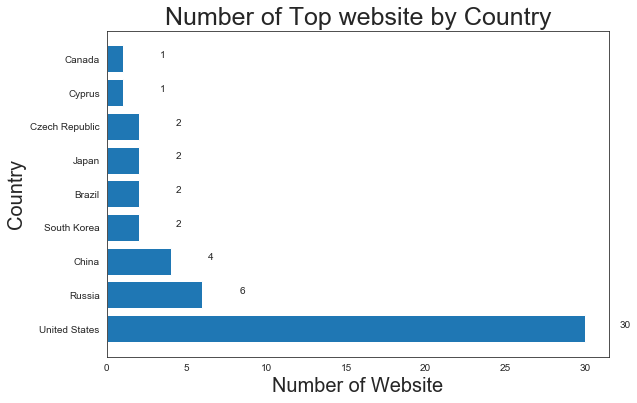

In [40]:

# creating the plot
figure, axis = plt.subplots(figsize = (9,6))


plot = axis.barh(top_country.index, top_country)
plt.title('Number of Top website by Country', size=25)
plt.xlabel('Number of Website', size = 20)
plt.ylabel('Country', size = 20)

for rectangle in plot:
    width = rectangle.get_width()
    axis.text(width + 2.5, rectangle.get_y() + 0.38, '%d' % int(width), ha = 'center', va ='bottom')

plt.savefig('barhchat.png', bbox_inches='tight')
plt.show();

In [57]:
# top ten website

df.groupby("Country")["SmilarWeb Rank"].count()

Country
Brazil             2
Canada             1
China              4
Cyprus             1
Czech Republic     2
Japan              2
Russia             6
South Korea        2
United States     30
Name: SmilarWeb Rank, dtype: int64

In [61]:
# number of top site by Domain name

df["Category"].value_counts()

Computers Electronics and Technology    26
News and Media                           8
Adult                                    4
Arts & Entertainment                     4
Science and Education                    2
E commerce and Shopping                  2
Games                                    2
Adult content                            1
Reference Materials                      1
Name: Category, dtype: int64

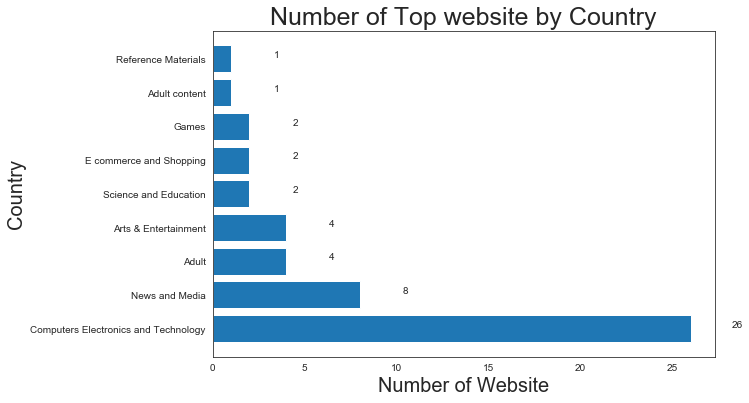

In [62]:
# creating the plot

top_category = df["Category"].value_counts()
figure, axis = plt.subplots(figsize = (9,6))


plot = axis.barh(top_category.index, top_category)
plt.title('Number of Top website by Country', size=25)
plt.xlabel('Number of Website', size = 20)
plt.ylabel('Country', size = 20)

for rectangle in plot:
    width = rectangle.get_width()
    axis.text(width + 2.5, rectangle.get_y() + 0.38, '%d' % int(width), ha = 'center', va ='bottom')

plt.savefig('barhchat.png', bbox_inches='tight')
plt.show();

In [58]:
df.columns

Index(['Site', 'Domain Name', 'Category', 'SubCategory', 'Country',
       'SmilarWeb Rank'],
      dtype='object')